# 주제 예측 관련

## 라이브러리 로드

In [ ]:
### 라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime
import os
import re
import pickle
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LinearRegression

!pip install koreanize_matplotlib
import koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 14.6 MB/s eta 0:00:00


In [ ]:
from collections import Counter

## 서울시 평생교육 강좌 정보
* 온라인
* 오프라인

In [ ]:
# 사이버 강좌
lec_on_df = pd.read_csv('/content/drive/MyDrive/PROJECT/교육데이터분석공모전/교육데이터모음/서울시 평생학습포털 사이버강의 정보.csv', encoding = 'cp949')
lec_on_df.head()


,아이디,강의 아이디,강의 카테고리 아이디,강의 카테고리명,강의 명,비용,강의 구분,주차 사용 여부,분반 일련번호,수강신청 시작 일자,...,인기여부,신규여부,상태,강의 이미지 파일 경로,수집데이터 아이디,과목 아이디,미리보기 주소,콘텐츠 아이디,회차번호,회차수
0,ASP00001,ASP00001S100120240107212,202303095029768,직업상담사,직업상담사 필기 - 직업상담학,무료,1,N,1,2024.05.01~2024.12.31,...,N,N,ING,/upload/course/ASP00001/2024/04/ASP00001S10012...,NaN,S12322,https://cdn.seoul.go.kr:443/mvod/_definst_/mp4...,202404300931251714437085237,131741,1
1,ASP00001,ASP00001S100120240107208,202303092587862,전문기술과정,한글 2022 제대로 배우기 완전정복편,무료,1,N,1,2024.04.25~2024.12.31,...,N,N,ING,/upload/course/ASP00001/2024/04/서울런4050 썸네일 3.png,NaN,S12321,https://cdn.seoul.go.kr:443/mvod/_definst_/mp4...,202404241001221713920482278,131721,1
2,ASP00001,ASP00001S100120240107207,202303092587862,전문기술과정,[오늘부터 정시퇴근] 파워포인트 실무 테크닉 완전정복편,무료,1,N,1,2024.04.25~2024.12.31,...,N,N,ING,/upload/course/ASP00001/2024/04/서울런4050 썸네일 2.png,NaN,S12320,https://cdn.seoul.go.kr:443/mvod/_definst_/mp4...,202404240951571713919917192,131657,1
3,ASP00001,ASP00001S100120240107206,202303092587862,전문기술과정,일잘러의 진짜 엑셀 완전정복편,무료,1,N,1,2024.04.25~2024.12.31,...,N,N,ING,/upload/course/ASP00001/2024/04/서울런4050 썸네일 1[...,NaN,S12319,https://cdn.seoul.go.kr:443/mvod/_definst_/mp4...,202404240944271713919467564,131627,1
4,ASP00001,ASP00001S100120240107193,20230313417069,기타,2024년 서울특별시의회 의정모니터 교육,무료,1,N,1,2024.04.09~2024.12.31,...,N,N,ING,/upload/course/ASP00001/2024/04/썸네일[3].jpg,NaN,S12317,https://cdn.seoul.go.kr:443/mvod/_definst_/mp4...,202404081558061712559486786,131619,1


In [ ]:
lec_on_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   아이디             930 non-null    object 
 1   강의 아이디          930 non-null    object 
 2   강의 카테고리 아이디     930 non-null    int64  
 3   강의 카테고리명        930 non-null    object 
 4   강의 명            930 non-null    object 
 5   비용              930 non-null    object 
 6   강의 구분           930 non-null    int64  
 7   주차 사용 여부        930 non-null    object 
 8   분반 일련번호         930 non-null    int64  
 9   수강신청 시작 일자      930 non-null    object 
 10  강의 시작 일자        930 non-null    object 
 11  등록 일자           930 non-null    object 
 12  수강신청 시작 일자.1    930 non-null    object 
 13  콘텐츠 미리보기 url    0 non-null      float64
 14  콘텐츠 미리보기 url.1  181 non-null    float64
 15  콘텐츠 미리보기 url.2  181 non-null    float64
 16  수료증 로트 명        0 non-null      float64
 17  기관 아이디          930 non-null    obj

In [ ]:
# 강의 카테고리명, 강의 명, 비용 열 불러오기
lec_on_final_df = lec_on_df[['강의 카테고리명', '강의 명', '비용']]
lec_on_final_df.head()

,강의 카테고리명,강의 명,비용
0,직업상담사,직업상담사 필기 - 직업상담학,무료
1,전문기술과정,한글 2022 제대로 배우기 완전정복편,무료
2,전문기술과정,[오늘부터 정시퇴근] 파워포인트 실무 테크닉 완전정복편,무료
3,전문기술과정,일잘러의 진짜 엑셀 완전정복편,무료
4,기타,2024년 서울특별시의회 의정모니터 교육,무료


In [ ]:
# 특수기호 제거 함수
def remove_special_characters(text):
    # 특수기호와 숫자를 제거합니다.
    return re.sub(r'[^가-힣a-zA-Z\s]', '', text)

# 강의 명 컬럼에 특수기호 제거 적용
lec_on_final_df['강의 명'] = lec_on_final_df['강의 명'].apply(remove_special_characters)

In [ ]:
lec_on_final_df.head()

,강의 카테고리명,강의 명,비용
0,직업상담사,직업상담사 필기 직업상담학,무료
1,전문기술과정,한글 제대로 배우기 완전정복편,무료
2,전문기술과정,오늘부터 정시퇴근 파워포인트 실무 테크닉 완전정복편,무료
3,전문기술과정,일잘러의 진짜 엑셀 완전정복편,무료
4,기타,년 서울특별시의회 의정모니터 교육,무료


In [ ]:
lec_on_final_df.iloc[:, 0].unique()

array(['직업상담사', '전문기술과정', '기타', '리더십/인사조직', '셀프브랜딩', '공인중개사', '주택관리사',
       '인권', '인문학', '창업과정', '웹툰/이모티콘', '직무역량과정', '방송/영상', '부모교육',
       '국가기술자격', '사회/교양', '콘텐츠산업 전문과정', '사회복지사', '경영일반', '금융/회계', '영어',
       '건강관리', 'OA활용', '일본어', '중국어', '기타외국어', '아동/청소년', '신기술교육', '문화예술',
       '프로그래밍', '금융', '창업', '공인중개사 연수교육', '인공지능', 'AR/VR', '취업', '시니어취업',
       '취미생활', '멀티미디어', '국가공인민간자격', '소셜미디어'], dtype=object)

In [ ]:
# 오프라인 강좌 정보
lec_off_df = pd.read_csv('/content/drive/MyDrive/PROJECT/교육데이터분석공모전/교육데이터모음/서울시 평생학습포털 오프라인강좌 정보.csv', encoding = 'cp949')
lec_off_df.head()

,사이트 아이디,ASP 아이디,강의 아이디,강의 구분,강의 명,수강신청 시작 일자,수강신청 종료 일자,강의 시작 일자,강의 종료 일자,강의대상,정원,수강신청 URL,등록 일자,수정 일자,교육기관 고유아이디,교육기관명,교육기관 자치구,교육기관 위도 좌표,교육기관 경도 좌표
0,lc1,ASP00001,ASP00001S100120240107289,오프라인,세계문화교실 - 케냐 및 예멘,202405141000,202406062359,20240613,20240704,NaN,30,NaN,20240514100501,20240514100501,S1001,서울시(평생교육과),중구,37.564512,126.975737
1,lc1,ASP00001,ASP00001S100120240107288,오프라인,인디서울 6월 독립영화상영회 &lt;어른 김장하&gt;,202405141000,202406281600,20240628,20240628,NaN,40,NaN,20240513170523,20240513170523,S1001,서울시(평생교육과),중구,37.564512,126.975737
2,lc1,ASP00001,ASP00001S100120240107287,오프라인,인디서울 6월 독립영화상영회 &lt;막걸리가 알려줄거야&gt;,202405141000,202406101600,20240610,20240610,NaN,40,NaN,20240513170513,20240513170513,S1001,서울시(평생교육과),중구,37.564512,126.975737
3,lc1,ASP00001,ASP00001S100120240107286,오프라인,인디서울 5월 독립영화상영회 &lt;버텨내고 존재하기&gt;,202405141000,202405311500,20240531,20240531,NaN,40,NaN,20240513150553,20240513150553,S1001,서울시(평생교육과),중구,37.564512,126.975737
4,lc1,ASP00001,ASP00001S100120240107284,오프라인,"[6월 모두공연장] 마술 한 스푼, 마임 한 꼬집",202405141000,202406062300,20240608,20240608,NaN,40,NaN,20240510150504,20240510150504,S1001,서울시(평생교육과),중구,37.564512,126.975737


In [ ]:
lec_off_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   사이트 아이디     431 non-null    object 
 1   ASP 아이디     431 non-null    object 
 2   강의 아이디      431 non-null    object 
 3   강의 구분       431 non-null    object 
 4   강의 명        431 non-null    object 
 5   수강신청 시작 일자  431 non-null    int64  
 6   수강신청 종료 일자  431 non-null    int64  
 7   강의 시작 일자    431 non-null    int64  
 8   강의 종료 일자    431 non-null    int64  
 9   강의대상        0 non-null      float64
 10  정원          431 non-null    int64  
 11  수강신청 URL    381 non-null    object 
 12  등록 일자       431 non-null    int64  
 13  수정 일자       431 non-null    int64  
 14  교육기관 고유아이디  431 non-null    object 
 15  교육기관명       431 non-null    object 
 16  교육기관 자치구    431 non-null    object 
 17  교육기관 위도 좌표  429 non-null    float64
 18  교육기관 경도 좌표  429 non-null    float64
dtypes: float64(3), int64(7), obje

In [ ]:
lec_off_df = lec_off_df[['강의 명', '교육기관명', '교육기관 자치구', '교육기관 위도 좌표','교육기관 경도 좌표' ]]
lec_off_df.head()

,강의 명,교육기관명,교육기관 자치구,교육기관 위도 좌표,교육기관 경도 좌표
0,세계문화교실 - 케냐 및 예멘,서울시(평생교육과),중구,37.564512,126.975737
1,인디서울 6월 독립영화상영회 &lt;어른 김장하&gt;,서울시(평생교육과),중구,37.564512,126.975737
2,인디서울 6월 독립영화상영회 &lt;막걸리가 알려줄거야&gt;,서울시(평생교육과),중구,37.564512,126.975737
3,인디서울 5월 독립영화상영회 &lt;버텨내고 존재하기&gt;,서울시(평생교육과),중구,37.564512,126.975737
4,"[6월 모두공연장] 마술 한 스푼, 마임 한 꼬집",서울시(평생교육과),중구,37.564512,126.975737


In [ ]:
# 한글 불용어 목록 정의
stopwords = [
    '및', '및', '등', '수', '것', '그', '이', '저', '가', '의', '들', '은', '는', '을', '를', '에', '와', '과', '한',
    '하다', '있다', '되다', '수', '보이다', '않다', '없다', '않다', '하다', '위해', '때문', '그렇다', '그런', '그렇다',
    '그렇다', '그렇다', '그렇다', '이다', '아니다', '보다', '오다', '가다', '하다', '하다', '되다', '되다', '되다', '되다', '위한', '교육', '및', '내', '과정', '이해', '함께하는', '노하우', '슬기로운', '실전', '서울시', '콘텐츠', '퀵', '이야기', 'step', '예방'
]

def preprocess_text(text):
    # 특수문자 제거
    text = re.sub(r'[^가-힣\s]', '', text)
    # 불용어 제거
    text = ' '.join([word for word in text.split() if word not in stopwords])
    return text

# 강의명 전처리
lec_off_df['강의 명'] = lec_off_df['강의 명'].apply(preprocess_text)

# 결과 출력
print(lec_off_df[['강의 명']])

                              강의 명
0                     세계문화교실 케냐 예멘
1            인디서울 월 독립영화상영회 어른 김장하
2        인디서울 월 독립영화상영회 막걸리가 알려줄거야
3         인디서울 월 독립영화상영회 버텨내고 존재하기
4              월 모두공연장 마술 스푼 마임 꼬집
..                             ...
426  평생교육바우처 지원 부부가 함께 하는 아르헨티나 땅고
427                 돈버는 수익형 전자책만들기
428                인공지능을 활용한 블로그운영
429                      누구나 작가가 될
430                     바리스타급 양성과정

[431 rows x 1 columns]


### 온라인, 오프라인 전처리한 강의명 통합
* 온라인 강의는 카테고리명 있음

In [ ]:
# 두 데이터프레임을 '강의 명'을 기준으로 합치기
merged_df = pd.merge(lec_on_final_df, lec_off_df, on='강의 명', how='outer')

# 필요한 열만 선택
final_df = merged_df[['강의 카테고리명', '강의 명', '비용']]

# 결과 확인
print(final_df.head())

  강의 카테고리명                          강의 명  비용
0    직업상담사               직업상담사 필기  직업상담학  무료
1   전문기술과정             한글  제대로 배우기 완전정복편  무료
2   전문기술과정  오늘부터 정시퇴근 파워포인트 실무 테크닉 완전정복편  무료
3   전문기술과정              일잘러의 진짜 엑셀 완전정복편  무료
4       기타            년 서울특별시의회 의정모니터 교육  무료


In [ ]:
final_df.head()

,강의 카테고리명,강의 명,비용
0,직업상담사,직업상담사 필기 직업상담학,무료
1,전문기술과정,한글 제대로 배우기 완전정복편,무료
2,전문기술과정,오늘부터 정시퇴근 파워포인트 실무 테크닉 완전정복편,무료
3,전문기술과정,일잘러의 진짜 엑셀 완전정복편,무료
4,기타,년 서울특별시의회 의정모니터 교육,무료


In [ ]:
final_title_df = final_df[['강의 명']]
final_title_df.head()

,강의 명
0,직업상담사 필기 직업상담학
1,한글 제대로 배우기 완전정복편
2,오늘부터 정시퇴근 파워포인트 실무 테크닉 완전정복편
3,일잘러의 진짜 엑셀 완전정복편
4,년 서울특별시의회 의정모니터 교육


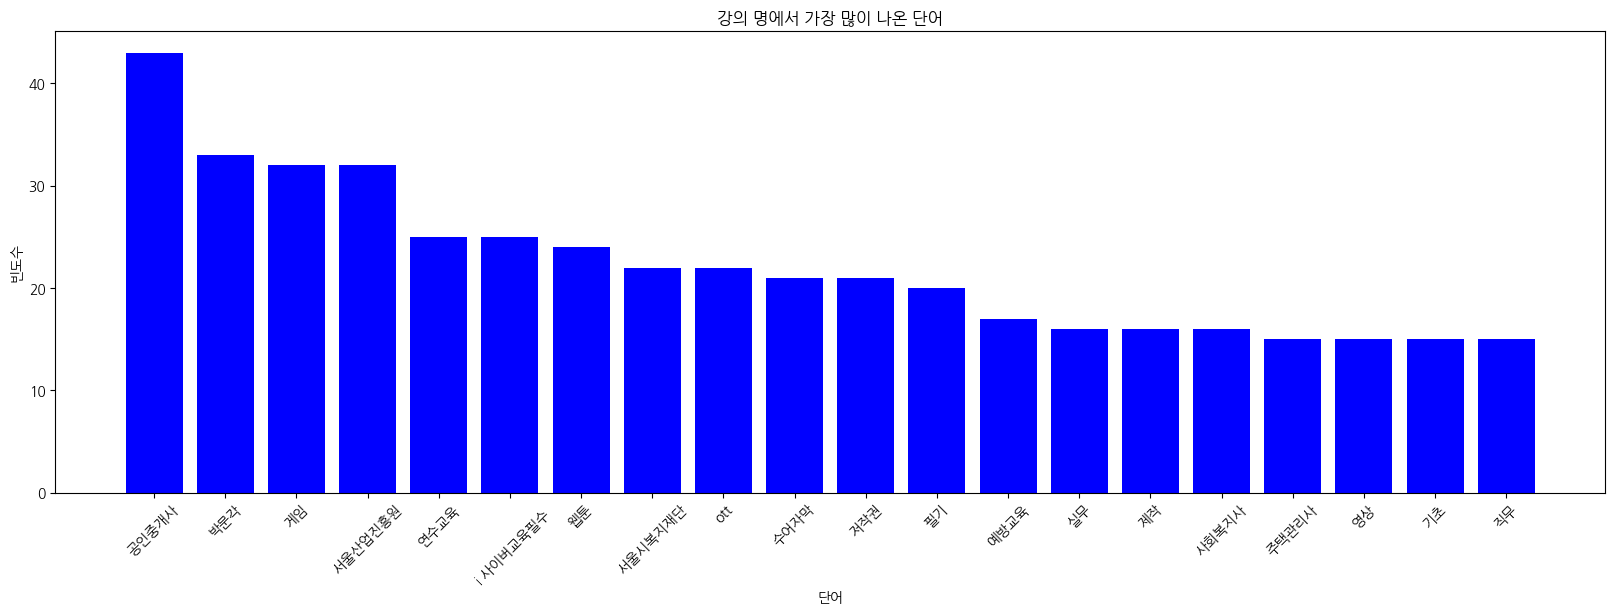

In [ ]:
# 불용어 목록 정의 (한국어 및 영어)
stop_words = set(['위한', '교육', '및', '내', '과정', '이해', '함께하는', '노하우', '슬기로운', '실전', '서울시', '콘텐츠', '1', '퀵', '이야기', '2','1급', 'step', '예방'])

def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # 특수문자 제거
    text = text.lower()  # 소문자로 변환
    words = text.split()
    words = [word for word in words if word not in stop_words]  # 불용어 제거
    return ' '.join(words)

all_words = ' '.join(lec_on_df['강의 명'].apply(preprocess_text)).split()
word_counts = Counter(all_words)

# 상위 10개 단어 시각화
common_words = word_counts.most_common(20)
words, counts = zip(*common_words)

plt.figure(figsize=(20, 6))
plt.bar(words, counts, color='blue')
plt.xlabel('단어')
plt.ylabel('빈도수')
plt.title('강의 명에서 가장 많이 나온 단어')
plt.xticks(rotation=45)
plt.show()

In [ ]:
program_df = pd.read_csv('/content/drive/MyDrive/PROJECT/교육데이터분석공모전/교육데이터모음/평생교육기관+프로그램(수요대상별_유형별)_20240516223620.csv')
program_df.head()

,프로그램별(1),프로그램별(2),수요대상별(1),수요대상별(2),2016,2017,2018
0,합계,소계,계,소계,107667,114348,112531
1,합계,소계,계,어린이,9343,9500,9050
2,합계,소계,계,청소년,5451,4753,3401
3,합계,소계,계,성인,78877,88336,88707
4,합계,소계,계,노인,4643,4557,4013


In [ ]:
program_1_df = program_df.iloc[:, 3:]
program_1_df.head()

,수요대상별(2),2016,2017,2018
0,소계,107667,114348,112531
1,어린이,9343,9500,9050
2,청소년,5451,4753,3401
3,성인,78877,88336,88707
4,노인,4643,4557,4013


### 한국기술교육대학교 온라인 평생교육원 이러닝 콘텐츠 목록



In [ ]:
e_con_df = pd.read_csv('/content/drive/MyDrive/PROJECT/교육데이터분석공모전/교육데이터모음/한국기술교육대학교_온라인평생교육원 이러닝 콘텐츠 목록_20230925.csv', encoding = ' cp949')
e_con_df.head()

,번호,개발연도,교육구분,분야,콘텐츠명,회차
0,1,2014,평생능력개발,기계,AutoCAD를 활용한 기계도면(기본),22
1,2,2014,평생능력개발,기계,AutoCAD를 활용한 기계도면(응용),21
2,3,2014,평생능력개발,기계,CATIA를 활용한 3D설계(기본),20
3,4,2014,평생능력개발,기계,CATIA를 활용한 3D설계(응용),20
4,5,2014,평생능력개발,기계,CNC선반 프로그램과 활용,24


In [ ]:
e_con_df['교육구분'].unique()

array(['평생능력개발', '학점은행', '일학습병행', '취준생무료강의', '신기술', '가상연계', '평생',
       '평생(재개발)', '학점(재개발)', '플랫폼종사자', '취준생'], dtype=object)

In [ ]:
e_con_num_df = e_con_df.set_index('번호')

In [ ]:
e_con_num_df.head()

,개발연도,교육구분,분야,콘텐츠명,회차
번호,,,,,
1,2014,평생능력개발,기계,AutoCAD를 활용한 기계도면(기본),22
2,2014,평생능력개발,기계,AutoCAD를 활용한 기계도면(응용),21
3,2014,평생능력개발,기계,CATIA를 활용한 3D설계(기본),20
4,2014,평생능력개발,기계,CATIA를 활용한 3D설계(응용),20
5,2014,평생능력개발,기계,CNC선반 프로그램과 활용,24


In [ ]:
# 2. 결측치 처리 (예시: 결측치가 있으면 0으로 대체)
e_con_num_df.fillna(0, inplace=True)

# 3. 데이터 형식 변환
e_con_num_df['개발연도'] = e_con_num_df['개발연도'].astype(int)
e_con_num_df['회차'] = e_con_num_df['회차'].astype(int)


In [ ]:
e_con_num_df.head()

,개발연도,교육구분,분야,콘텐츠명,회차
번호,,,,,
1,2014,평생능력개발,기계,AutoCAD를 활용한 기계도면(기본),22
2,2014,평생능력개발,기계,AutoCAD를 활용한 기계도면(응용),21
3,2014,평생능력개발,기계,CATIA를 활용한 3D설계(기본),20
4,2014,평생능력개발,기계,CATIA를 활용한 3D설계(응용),20
5,2014,평생능력개발,기계,CNC선반 프로그램과 활용,24


In [ ]:
e_con_title = e_con_num_df[['콘텐츠명']]
e_con_title.head()

,콘텐츠명
번호,
1,AutoCAD를 활용한 기계도면(기본)
2,AutoCAD를 활용한 기계도면(응용)
3,CATIA를 활용한 3D설계(기본)
4,CATIA를 활용한 3D설계(응용)
5,CNC선반 프로그램과 활용


### 중장년 특화 사이트 강의명

In [ ]:
data = [
    '100% 합격하는 면접 답변 만들기',
    '기업이 원하는 입사서류 작성법과 면접 활용법',
    '[취업 면접] 서류부터 최종면접까지, 취업 면접의 모든 것',
    '성품 검증 인성면접 질문과 모범답변사례',
    '인·적성검사 검증 질문과 맞춤 답변하기',
    '자기분석과 후회 없는 직업 선택하기',
    '저축만으로 살기에 불안한 미래',
    'ai 면접의 이해와 퍼팩트 대비',
    '[hd]누구나 쉽게 생산성을 높이는 notion 데이터베이스 - 중급1',
    '[hd]누구나 쉽게 생산성을 높이는 notion 데이터베이스 - 중급2',
    '[hd]누구나 쉽게 생산성을 높이는 notion 데이터베이스 - 고급1',
    '[hd]누구나 쉽게 생산성을 높이는 notion 데이터베이스 - 고급2',
    '데이터사이언스 훈련소 - 입소하기',
    '비즈니스를 바꾸는 20가지 dt tool',
    '[hd]누구나 쉽게 생산성을 높이는 notion 데이터베이스 - 입문',
    '똑똑하게 일하는 노하우 - 노션 ＆ 먼데이 활용법',
    '[북러닝] 90년생이 사무실에 들어오셨습니다',
    '[북러닝] 센 세대, 낀 세대, 신세대: 3세대 전쟁과 평화',
    '[북러닝] 레드의 법칙',
    '[북러닝] 이것이 마이데이터다',
    '[북러닝] 폼 잡지 말고 플랫폼 잡아라',
    '[북러닝] 당신이 내 이름을 불러준 순간',
    '[북러닝] 혼돈의 시대, 경제의 미래',
    '[북러닝] 김경일의 마스터피스; 심리학 - 창의성이 없는게 아니라 꺼내지 못하는 겁니다',
    '[h pick+셀] ebs 창업가의 성공',
    'ces 2024 디브리핑 - "all together, all on"',
    '[h pick+셀] ebs 실패하지 않는 온라인 창업의 비밀',
    '[카드뉴스] 조영탁의 사장학 : 슬기로운 ceo 생활',
    '[h pick+셀] ebs 유니콘 기업을 꿈꾸는 창업가에게',
    '데이터사이언스 훈련소 - dataframe 다루기 및 시각화',
    '[북러닝] 책을 읽어드립니다_데일카네기의 인간관계론',
    '[북러닝] 책을 읽어드립니다_데일카네기의 스피치 ＆ 커뮤니케이션',
    '[북러닝] 행복해지려는 관성',
    '[북러닝] 12 ½ 부와 성공을 부르는 12가지 원칙',
    '[북러닝] 기획자가 일 잘하는 법',
    '[북러닝] 내 감정에 말 걸기',
    '[북러닝] 언바운드',
    '[북러닝] 모빌리티 미래권력',
    '[북러닝] 리셋하고 리드하라',
    '[ds class] 데이터 리터러시 overview',
    '[h pick+셀] ebs 베트남 스타트업처럼',
    '노무사say 팬더믹 이후 조직문화 이슈',
    '리더들의 감정주치의, 이동환의 감정수업',
    '[북러닝] 이소은의 랜선 멘토링 - 지금의 나로 충분하다',
    '[#말.잘.알] 말잘러를 위한 어휘력트레이닝',
    '데이터분석 및 관리를 위한 엑셀스킬실무',
    '핵심만 콕! 창의적 의사결정의 핵심과 실천',
    '문해력 강화의 시작! 듣기 혁명',
    '[정체성 리부팅] 나를 발견하는 심리학',
    '[h pick+셀] 결정의 신, 데이터 애널리틱스',
    '[h pick+셀] 스타트업에서 혁신을 훔쳐오라',
    '[h pick+셀] 직장인의 무기가 되는 비즈니스 ai',
    '[h pick+셀] 직장인의 무기가 되는 챗gpt 활용',
    '[h pick+셀] ebs 상권, 참 알기 쉽쥬?',
    '[h pick+셀] ebs 운동합시다! 1',
    '[h pick+셀] ebs 운동합시다! 2',
    '[h pick+셀] ebs 운동합시다! 3',
    '고성과자의 셀프 임파워! 자존감 노트',
    '데이터사이언스 훈련소 - 웹크롤링을 활용한 분석실습',
    '핵심만 콕! 뉴 노멀 시대의 커뮤니케이션 스킬',
    '핵심만 콕! 문제 원인 파악과 창조적 문제 해결',
    '핵심만 콕! 빈틈없는 계약서 작성 실무',
    'chatgpt, 멀티모달 ai의 미래를 열다',
    '글로벌 hr 트렌드 : 미래조직 혁신전략',
    '[h pick+셀] ebs 나를 이해하는 법',
    '[h pick+셀] ebs 스트레스 지우개',
    '[레전드 스킬] 협업이 이렇게 쉽다고? 노션&구글워크스페이스',
    'k-경영, 한국식 모순 경영의 힘',
    '요즘 시대 성공하는 마인드셋, 디자인 마인드',
    '조직을 이끄는 힘, 물리학에서 찾은 리더십의 본질',
    '[ds class] 데이터 분석 전처리 실무, 파워쿼리 part.1',
    '[ds class] 데이터 분석 전처리 실무, 파워쿼리 part.2',
    '[ds class] 비즈니스 애널리틱스, 데이터 기반 마케팅 영업 전략 실무 마스터 클래스',
    '[ds class] 비즈니스 애널리틱스, 데이터 기반 전략 수립 실무 마스터 클래스',
    '디커플링, 시장을 지배하는 비즈니스모델 혁신 방법[기본편]',
    '디커플링, 시장을 지배하는 비즈니스모델 혁신 방법[적용편]',
    '리더를 위한 노무 인사이트',
    '모든 것은 고객경험으로 연결된다',
    '스타트업형 조직 오퍼레이션 리더십',
    '시대를 이끌고, 변화를 주도하는 90년대생 ceo',
    'gpt-x 시대의 마케팅',
    '삶의 패러다임을 바꾸는 ai, chatgpt',
    '[인재주의] 탤런트 엔진을 장착하라',
    '진정한 리더는 위기에서 빛난다',
    '데이터로 인사를 혁신하라 : hr analytics',
    '[리더십 마스터] 오늘부터 시작하라: 생각을 바꾸는 인문학',
    '[소확성] 프로필 시대를 살아가는 우리를 위한 얼굴소통법',
    '글로벌 리더를 통해 배우는 성공의 리더십',
    '나를 넘어서는 힘, 스포츠 이노베이션',
    '[h pick+셀] ebs 치매에 대처하는 기술',
    '[툰x러닝] 만화로 배우는 how to 중기경영계획 수립 ＆ 실행',
    '[ds class] 통계 분석 마스터 클래스 part. 1',
    '[ds class] 통계 분석 마스터 클래스 part. 2',
    '챗gpt, 세상을 바꾸다: 생성 ai가 바꾸는 미래 사회',
    '[#법.잘.알] 핵심만 쏙쏙! 기업법무실무',
    '[비전공자를 위한 데이터사이언스] [get it trend] 빅데이터, 비즈니스 애널리틱스로 경쟁력을 높여라!',
    '[힐링 워크#] [슬기로운 직장생활] 스트레스 관리',
    '[ds class] 데이터 사이언스 입문 부트캠프 part.1',
    '[ds class] 데이터 사이언스 입문 부트캠프 part.2',
    '디지털 혁신의 비밀, 데이터 문제해결력',
    '이소은의 퍼블릭 스피킹, 말하기를 말하다',
    '챗gpt, 세상을 바꾸다: 생성 ai가 바꾸는 미래 사회',
    '[마케팅 스쿨] sns 인플루언서 마케팅',
    '개인정보보호법의 이해와 실무',
    '알아두면 쓸모있는 심리학 잡학사전',
    '글로벌 트렌드: csr을 넘어서 esg까지',
    '[h pick+셀] 당신의 의사결정을 돕는 경제사학',
    '리스크 관리 마스터 클래스',
    '[ds class] 통계 분석 마스터 클래스 part. 2',
    '[ds class] 데이터 사이언스 입문 부트캠프 part.2',
    '[ds class] 데이터 리터러시 overview',
    '[ds class] 비즈니스 애널리틱스, 데이터 기반 전략 수립 실무 마스터 클래스',
    '[ds class] 데이터 분석 전처리 실무, 파워쿼리 part.2',
    '[ds class] 비즈니스 애널리틱스, 데이터 기반 마케팅 영업 전략 실무 마스터 클래스',
    '데이터사이언스 훈련소 - 입소하기',
    '데이터사이언스 훈련소 - dataframe 다루기 및 시각화',
    '데이터사이언스 훈련소 - 웹크롤링을 활용한 분석실습',
]

# 전처리 함수 정의
def preprocess_title(title):
    # 특수문자 제거 및 소문자 변환
    title = re.sub(r'[^a-zA-Z0-9가-힣\s]', '', title).lower()
    # 공백 제거
    title = re.sub(r'\s+', '', title)
    return title

# 전처리된 강의명 리스트 생성
preprocessed_data = [preprocess_title(title) for title in data]
preprocessed_data[:10]



['100합격하는면접답변만들기',
 '기업이원하는입사서류작성법과면접활용법',
 '취업면접서류부터최종면접까지취업면접의모든것',
 '성품검증인성면접질문과모범답변사례',
 '인적성검사검증질문과맞춤답변하기',
 '자기분석과후회없는직업선택하기',
 '저축만으로살기에불안한미래',
 'ai면접의이해와퍼팩트대비',
 'hd누구나쉽게생산성을높이는notion데이터베이스중급1',
 'hd누구나쉽게생산성을높이는notion데이터베이스중급2']

### 서울시 관내 시설 프로그램 정보

In [ ]:
# 서울특별시 서초구
seocho_df = pd.read_csv('/content/drive/MyDrive/PROJECT/교육데이터분석공모전/교육데이터모음/서울특별시 서초구_평생학습강좌_20230628.csv', encoding = 'cp949')
seocho_df.head()

,강좌명,강사명,교육시작일자,교육종료일자,교육시작시각,교육종료시각,강좌내용,교육대상구분,교육방법구분,운영요일,...,운영기관전화번호,접수시작일자,접수종료일자,접수방법구분,선정방법구분,홈페이지주소,직업능력개발훈련비지원강좌여부,학점은행제평가(학점)인정여부,평생학습계좌제평가인정여부,데이터기준일자
0,스마트폰 기초부터 영상제작까지,황혜정,2023-06-01,2023-08-17,10:00,12:00,스마트폰 활용법,서초구민,온라인,목,...,02-2155-8394,2023-05-01,NaN,온라인,선착순,NaN,N,N,N,2023-06-28
1,문학의 선율,김은경,2023-07-24,2023-08-28,10:00,12:00,클래식 음악축제를 중심으로 문학도시들의 아름다움을 발견하는 과정,서초구민,온라인,월,...,02-2155-8394,2023-05-01,NaN,온라인,선착순,NaN,N,N,N,2023-06-28
2,연필스케치(여행&풍경) 기초,김현정,2023-06-20,2023-08-29,14:00,16:00,연필스케치로 풍경 어반 등 그림 그리기 수업,서초구민,오프라인,화,...,02-2155-8394,2023-05-01,NaN,온라인,선착순,NaN,N,N,N,2023-06-28
3,연필스케치(여행&풍경) 심화,김현정,2023-06-20,2023-08-29,10:00,12:00,연필스케치로 풍경 어반 등 그림 그리기 수업,서초구민,오프라인,화,...,02-2155-8394,2023-05-01,NaN,온라인,선착순,NaN,N,N,N,2023-06-28
4,어린이영어 <파닉스 고급반>,이소연,2023-06-01,2023-08-17,15:00,15:50,어린이 영어 수업,서초구민,오프라인,수,...,02-2155-8394,2023-05-01,NaN,온라인,선착순,NaN,N,N,N,2023-06-28


In [ ]:
seocho_df_1 = seocho_df[['강좌명', '강좌내용']]
seocho_df_1.head()

,강좌명,강좌내용
0,스마트폰 기초부터 영상제작까지,스마트폰 활용법
1,문학의 선율,클래식 음악축제를 중심으로 문학도시들의 아름다움을 발견하는 과정
2,연필스케치(여행&풍경) 기초,연필스케치로 풍경 어반 등 그림 그리기 수업
3,연필스케치(여행&풍경) 심화,연필스케치로 풍경 어반 등 그림 그리기 수업
4,어린이영어 <파닉스 고급반>,어린이 영어 수업


## 데이터 merge


In [ ]:
# Step 1: Convert preprocessed_data list to DataFrame
preprocessed_data_df = pd.DataFrame({'강의명': preprocessed_data})

# Step 2: Standardize column names for merging
e_con_title.rename(columns={'콘텐츠명': '강의명'}, inplace=True)
final_title_df.rename(columns={'강의 명': '강의명'}, inplace=True)

# Step 3: Merge all dataframes on '강의명'
merged_df = pd.concat([preprocessed_data_df, e_con_title[['강의명']], final_title_df[['강의명']]], ignore_index=True)

# Step 4: Drop duplicates if any
merged_df.drop_duplicates(subset=['강의명'], inplace=True)

# Step 5: Save to CSV
merged_df.to_csv('merged_courses.csv', index=False)


In [ ]:
merged_df.head()

,강의명
0,100합격하는면접답변만들기
1,기업이원하는입사서류작성법과면접활용법
2,취업면접서류부터최종면접까지취업면접의모든것
3,성품검증인성면접질문과모범답변사례
4,인적성검사검증질문과맞춤답변하기


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2660 entries, 0 to 2822
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   강의명     2660 non-null   object
dtypes: object(1)
memory usage: 41.6+ KB


In [ ]:
stopwords = ['의', '는', '이가', '하기', '부터', '까지', '를', '으로', '하는']
# 불용어 제거 함수
def remove_stopwords(text, stopwords):
    return ' '.join([word for word in text.split() if word not in stopwords])

# 특수문자 제거 및 영어 소문자 변환 함수
def clean_text(text):
    text = re.sub(r'[^a-zA-Z가-힣0-9\s]', '', text)  # 특수문자 제거
    text = text.lower()  # 영어 소문자 변환
    return text

# 전처리 적용
merged_df['강의명'] = merged_df['강의명'].apply(lambda x: remove_stopwords(x, stopwords))
merged_df['강의명'] = merged_df['강의명'].apply(clean_text)

# CSV 파일로 저장
output_path = '/content/drive/My Drive/PROJECT/교육데이터분석공모전/데이터분석/모델링_예측/merged_cs_data.csv'
merged_df.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f"CSV 파일이 성공적으로 저장되었습니다: {output_path}")

CSV 파일이 성공적으로 저장되었습니다: /content/drive/My Drive/PROJECT/교육데이터분석공모전/데이터분석/모델링_예측/merged_cs_data.csv


In [ ]:
print(merged_df.head())

                      강의명
0          100합격하는면접답변만들기
1     기업이원하는입사서류작성법과면접활용법
2  취업면접서류부터최종면접까지취업면접의모든것
3       성품검증인성면접질문과모범답변사례
4        인적성검사검증질문과맞춤답변하기


In [ ]:
daechi_df = pd.read_csv('')

FileNotFoundError: [Errno 2] No such file or directory: ''

In [ ]:
apgujung_df = pd.read_csv('/content/drive/MyDrive/PROJECT/교육데이터분석공모전/교육데이터모음/강남구도시관리공단_대치평생학습관 프로그램 정보_20240228.csv')

## 5060+ 관련 데이터

### 구인구직 데이터

In [ ]:
pl5060_df = pd.read_csv('/content/drive/MyDrive/PROJECT/교육데이터분석공모전/새로운 주제 데이터/만+50~64세+중장년+세대+-+새로운+일을+원할+시,+향후+희망+분야_20240526173636.csv')
pl5060_df.head(10)

In [ ]:
# 첫 번째 행을 컬럼 이름으로 설정하고 제거
new_header = pl5060_df.iloc[0]
pl5060_df = pl5060_df[1:]
pl5060_df.columns = new_header

In [ ]:
# '사례수 (명)' 컬럼을 정수형으로 변환
pl5060_df['사례수 (명)'] = pl5060_df['사례수 (명)'].astype(int)

# 비율을 나타내는 컬럼들을 실수형으로 변환
for col in pl5060_df.columns[2:]:
    pl5060_df[col] = pl5060_df[col].astype(float)

In [ ]:
pl5060_df.head()

### 적정 은퇴시기

In [ ]:
re_time_df = pd.read_csv('/content/drive/MyDrive/PROJECT/교육데이터분석공모전/새로운 주제 데이터/적정+은퇴시기_20240526173220.csv')
re_time_df.head(10)

In [ ]:
# 첫 번째 행(헤더 설명 행) 제거
re_time_df = re_time_df.drop(index=0)

# '-'을 NaN으로 변환하고, 가능하다면 숫자 타입으로 변환
re_time_df = re_time_df.replace('-', np.nan).apply(pd.to_numeric, errors='ignore', downcast='float')

# 구분별(1)과 구분별(2)를 합쳐서 새로운 구분 열 생성
re_time_df['구분'] = re_time_df['구분별(1)'] + '_' + re_time_df['구분별(2)']

# 불필요한 열 제거
re_time_df = re_time_df.drop(columns=['구분별(1)', '구분별(2)'])

# 결측값 처리 (예시: 결측값을 0으로 대체)
re_time_df = re_time_df.fillna(0)

In [ ]:
re_time_df.head()

### 희망하는 교육 정책

In [ ]:
hope_df = pd.read_csv('/content/drive/MyDrive/PROJECT/교육데이터분석공모전/새로운 주제 데이터/희망하는+교육과정_20240526173500.csv')
hope_df.head(10)

In [ ]:
# 1. 불필요한 행 제거 (첫 두 행)
hope_df = hope_df.drop([0, 1])

# 2. 열 이름 설정
hope_df.columns = ['구분별(1)', '구분별(2)', '전체', '문화예술스포츠교육', '인문교양교육', '직업능력향상교육', '학력보완교육', '문해교육', '시민교육', '정규교육과정', '기타', '받고 싶은 교육이 없다']

# 3. '구분별(1)'과 '구분별(2)'를 합쳐서 새로운 '구분' 열 생성
hope_df['구분'] = hope_df['구분별(1)'] + ' - ' + hope_df['구분별(2)']
hope_df = hope_df.drop(columns=['구분별(1)', '구분별(2)'])

# 4. 데이터 타입 변환
hope_df = hope_df.apply(pd.to_numeric, errors='ignore')

# 5. 결측값 처리 (필요에 따라)
hope_df = hope_df.replace('-', 0)

# 6. '구분' 열을 첫 번째로 이동
hope_df = hope_df[['구분'] + [col for col in hope_df.columns if col != '구분']]

In [ ]:
hope_df.head()

## 학점은행제 관련


### 평가인정 학습과목

In [ ]:
hak_2_1_df = pd.read_csv('/content/drive/MyDrive/PROJECT/교육데이터분석공모전/교육데이터모음/2023년 평생교육통계자료집/2023 평생교육통계자료집(엑셀)/Ⅳ. 평생교육제도/1.학점은행제/1-2. 학점은행제 평가인정 학습과목 개설 현황(1).csv')
hak_2_1_df.head(12)

In [ ]:
# 불필요한 행 제거 (예: 모든 값이 결측치인 행)
hak_2_1_df.dropna(how='all', inplace=True)

# 불필요한 열 제거 (예: 의미 없는 열)
# 'Unnamed:'로 시작하는 열 제거
hak_2_1_df = hak_2_1_df.loc[:, ~hak_2_1_df.columns.str.contains('^Unnamed')]

# 결측치 처리 (예: 특정 열의 결측치 값을 0으로 대체 또는 삭제)
# 여기서는 구체적인 처리 방법이 명시되지 않았으므로, 결측치가 있는 행을 삭제합니다.
hak_2_1_df.dropna(inplace=True)

# 데이터 타입 변환 (예: 숫자형 데이터로 변환)
# '합계', 'Unnamed: 3', 'Unnamed: 4' 등의 열이 숫자형 데이터를 포함하고 있다고 가정하고 변환합니다.
# 실제 열 이름에 맞게 수정해야 합니다.

# 데이터 인코딩 (예: 범주형 데이터를 숫자로 변환)
# '구분' 열이 범주형 데이터를 포함한다고 가정합니다.
hak_2_1_df['구분'] = hak_2_1_df['구분'].astype('category').cat.codes

# 데이터 스케일링 (예: Min-Max 스케일링)
# 모든 숫자형 열에 대해 Min-Max 스케일링을 적용합니다.
# 스케일링을 적용할 열이 명확하지 않으므로, 실제 숫자형 열에만 적용해야 합니다.
numeric_cols = hak_2_1_df.select_dtypes(include=[np.number]).columns
scaler = MinMaxScaler()
hak_2_1_df[numeric_cols] = scaler.fit_transform(hak_2_1_df[numeric_cols])

In [ ]:
# 불필요한 열 제거 (예: 'Unnamed:'로 시작하는 열)
hak_2_1_df = hak_2_1_df.loc[:, ~hak_2_1_df.columns.str.contains('^Unnamed')]

# 결측치 처리 (예: 결측치가 있는 행 삭제)
hak_2_1_df.dropna(inplace=True)

In [ ]:
hak_2_1_df

## 네이버 크롤링 데이터
* 뉴스
* 블로그